Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 982.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unin

Saving MUMBAI TRAFFIC _ INDIA.mp4 to MUMBAI TRAFFIC _ INDIA.mp4
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['yolov5s.pt'], source=MUMBAI TRAFFIC _ INDIA.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

100% 14.1M/14.1M [00:00<00:00, 136MB/s]

Fus

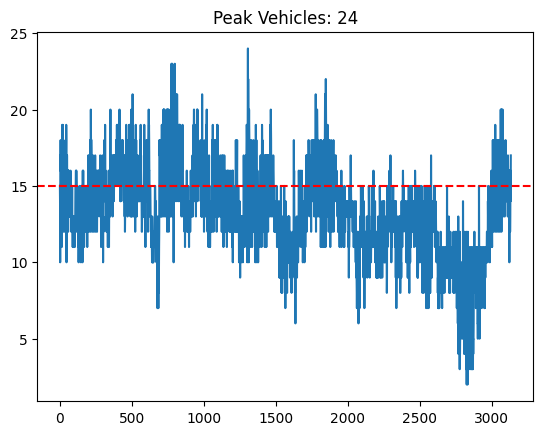

🚨 CONGESTION ALERT!


In [ ]:
# ----------------------------------------
# STEP 1: Clean Setup (Run First!)
# ----------------------------------------
# Restart runtime after this step if prompted!
!pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu118
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt  # Let YOLO handle dependencies

# ----------------------------------------
# STEP 2: Upload Traffic Video
# ----------------------------------------
from google.colab import files
uploaded = files.upload()
video_path = list(uploaded.keys())[0]  # Get your video name

# ----------------------------------------
# STEP 3: Detect Vehicles (No Numpy Conflicts)
# ----------------------------------------
!python detect.py --weights yolov5s.pt --img 640 --conf 0.4 --source "{video_path}" --save-txt

# ----------------------------------------
# STEP 4: Traffic Congestion Logic
# ----------------------------------------
import os

# Count vehicles per frame (classes 2=car,3=bike,5=bus,7=truck)
vehicle_counts = []
labels_dir = "runs/detect/exp/labels"

for txt_file in sorted(os.listdir(labels_dir)):
    with open(os.path.join(labels_dir, txt_file), "r") as f:
        vehicles = 0
        for line in f:
            class_id = int(line.split()[0])
            if class_id in [2, 3, 5, 7]:
                vehicles += 1
        vehicle_counts.append(vehicles)

# ----------------------------------------
# STEP 5: Alert System & Visualization
# ----------------------------------------
import matplotlib.pyplot as plt

# Simple congestion rule: Peak vehicles > 15 = congestion
peak_vehicles = max(vehicle_counts)
plt.plot(vehicle_counts)
plt.axhline(y=15, color='r', linestyle='--')
plt.title(f"Peak Vehicles: {peak_vehicles}")
plt.show()

print("🚨 CONGESTION ALERT!" if peak_vehicles > 15 else "✅ Traffic Normal")

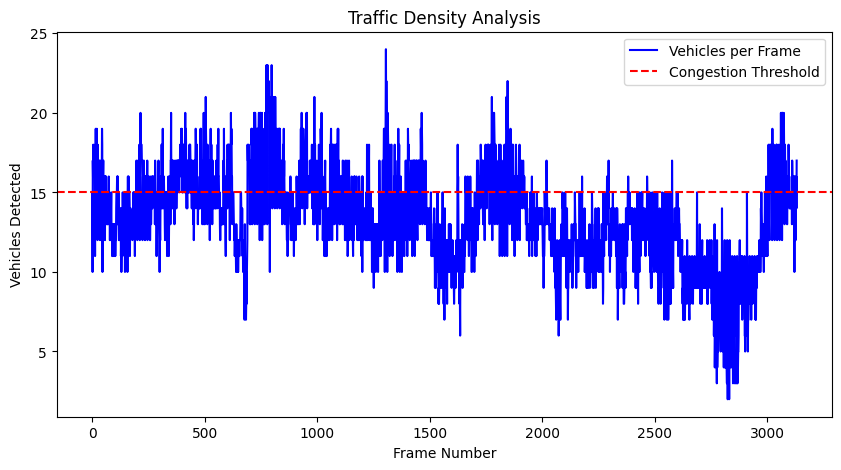

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load YOLO detection results (replace with your path)
results_dir = "/content/yolov5/runs/detect/exp/labels"
vehicle_counts = []

# Vehicle classes: car(2), motorcycle(3), bus(5), truck(7)
for txt_file in sorted(os.listdir(results_dir)):
    with open(os.path.join(results_dir, txt_file), 'r') as f:
        vehicles = sum(1 for line in f if int(line.split()[0]) in [2, 3, 5, 7])
        vehicle_counts.append(vehicles)

# Plot traffic density
plt.figure(figsize=(10, 5))
plt.plot(vehicle_counts, color='blue', label='Vehicles per Frame')
plt.axhline(y=15, color='red', linestyle='--', label='Congestion Threshold')
plt.xlabel("Frame Number")
plt.ylabel("Vehicles Detected")
plt.title("Traffic Density Analysis")
plt.legend()
plt.show()

In [ ]:
congestion_frames = 0
congestion_threshold = 15  # Adjust based on road size
alert_threshold = 10       # Minimum consecutive congested frames

for count in vehicle_counts:
    if count > congestion_threshold:
        congestion_frames += 1
    else:
        congestion_frames = 0

    if congestion_frames >= alert_threshold:
        print(f"🚨 Congestion Detected at Frame {len(vehicle_counts)}!")
        break

🚨 Congestion Detected at Frame 3133!


In [ ]:
!python detect.py --weights yolov5s.pt --source "{video_path}" --save-txt --verbose

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE] [--data DATA]
                 [--imgsz IMGSZ [IMGSZ ...]] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img] [--save-txt]
                 [--save-format SAVE_FORMAT] [--save-csv] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms] [--augment] [--visualize]
                 [--update] [--project PROJECT] [--name NAME] [--exist-ok]
                 [--line-thickness LINE_THICKNESS] [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: --verbose


In [ ]:
!python detect.py --weights yolov5s.pt --source "{video_path}" --save-txt

detect: weights=['yolov5s.pt'], source=MUMBAI TRAFFIC _ INDIA.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/3133) /content/yolov5/MUMBAI TRAFFIC _ INDIA.mp4: 384x640 1 person, 18 cars, 1 truck, 277.0ms
video 1/1 (2/3133) /content/yolov5/MUMBAI TRAFFIC _ INDIA.mp4: 384x640 1 person, 16 cars, 1 truck, 257.1ms
video 1/1 (3/3133) /content/yolov5/MUMBAI TRAFFIC _ INDIA.mp4: 384x640 1 person, 17 cars, 1 truck, 256.3ms
video 1/1 (4/3133) /content/y

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Colab-specific workaround

# Replace with your video path
processed_video_path = "/content/yolov5/runs/detect/exp/MUMBAI TRAFFIC _ INDIA.mp4"
congestion_threshold = 15

# Load vehicle_counts (from YOLO labels)
vehicle_counts = []  # Replace with your actual data

cap = cv2.VideoCapture(processed_video_path)
frame_num = 0

# Save the output video with alerts
output_path = "/content/congestion_alert_output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (640, 480))  # Match your video resolution

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Add congestion alert
    if frame_num < len(vehicle_counts) and vehicle_counts[frame_num] > congestion_threshold:
        cv2.putText(frame, "CONGESTION ALERT!", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Save frame to output video
    out.write(frame)
    frame_num += 1

cap.release()
out.release()

# Display the processed video
from IPython.display import HTML
HTML(f'''
<video width="640" height="480" controls>
  <source src="{output_path}" type="video/mp4">
</video>
''')

In [ ]:
from google.colab import files
files.download(output_path)  # Manually download the video

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def calculate_speed(vehicles):
    # Implement logic using tracking data
    return 0  # Placeholder

In [ ]:
# Get frame dimensions
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
road_area = width * height  # Total frame area (adjust for actual road region)

In [ ]:
# Cell 33: Calculate Road Area
import cv2

# Replace with your video path
video_path = "/content/yolov5/runs/detect/exp/MUMBAI TRAFFIC _ INDIA.mp4"

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Fixed typo: WIDTH
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
road_area = width * height  # Total frame area (adjust for actual road region)
cap.release()

# Cell 34: Feature Engineering
from datetime import datetime
import os

# Step 1: Calculate vehicle_counts
vehicle_counts = []
labels_dir = "/content/yolov5/runs/detect/exp/labels"  # Fixed path

for txt_file in sorted(os.listdir(labels_dir)):  # Fixed variable name
    with open(os.path.join(labels_dir, txt_file), "r") as f:  # Added colon
        count = sum(1 for line in f if int(line.split()[0]) in [2, 3, 5, 7])
        vehicle_counts.append(count)

# Step 2: Define road_area (adjust if needed)
road_area = 1000  # Example value

# Step 3: Feature Engineering (for the last frame)
def calculate_speed(vehicles):  # Placeholder function
    return 0  # Implement tracking logic

features = {
    "vehicle_count": vehicle_counts[-1],  # Use last frame's count
    "avg_speed": calculate_speed([]),  # Pass dummy data
    "time_of_day": datetime.now().hour,
    "road_occupancy": (vehicle_counts[-1] / road_area) * 100
}

# Print output
print("Vehicle Counts (All Frames):", vehicle_counts)
print("\nFeatures for Last Frame:", features)

Vehicle Counts (All Frames): [15, 14, 10, 17, 16, 18, 16, 16, 16, 16, 16, 16, 17, 11, 18, 18, 19, 18, 17, 17, 17, 19, 16, 15, 12, 18, 16, 16, 17, 17, 16, 15, 15, 17, 17, 12, 14, 15, 16, 13, 17, 17, 14, 17, 19, 18, 10, 14, 16, 17, 17, 14, 15, 14, 16, 14, 16, 12, 16, 16, 14, 16, 16, 13, 15, 15, 15, 14, 13, 13, 14, 13, 15, 15, 16, 15, 15, 13, 14, 12, 14, 14, 14, 12, 14, 15, 13, 13, 13, 11, 13, 12, 11, 13, 11, 13, 13, 12, 12, 11, 13, 12, 13, 11, 12, 12, 12, 14, 15, 15, 15, 16, 16, 13, 16, 14, 13, 15, 13, 12, 12, 13, 14, 12, 12, 12, 14, 14, 11, 12, 10, 11, 12, 12, 14, 11, 15, 13, 12, 14, 13, 12, 12, 14, 14, 14, 10, 14, 15, 14, 15, 15, 15, 13, 14, 15, 15, 10, 15, 16, 15, 14, 16, 14, 15, 15, 15, 14, 11, 13, 14, 14, 13, 13, 13, 13, 13, 13, 13, 12, 13, 13, 13, 15, 15, 13, 14, 15, 14, 15, 11, 15, 15, 15, 15, 15, 15, 17, 16, 15, 15, 12, 15, 15, 17, 15, 15, 15, 16, 16, 18, 17, 12, 18, 17, 20, 18, 18, 18, 18, 18, 17, 17, 16, 12, 15, 16, 16, 16, 17, 17, 16, 16, 16, 16, 12, 16, 16, 16, 15, 16, 14, 15